In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [5]:
df.drop(['id'],axis=1,inplace=True)

In [6]:
X = df.drop(['price'],axis=1)
y = df[['price']]

In [7]:
y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [8]:
num_col = X.select_dtypes(include=['int64','float64']).columns
cat_col = X.select_dtypes(include=['object']).columns

In [9]:
print(num_col)
print(cat_col)

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


In [10]:
for i in cat_col:
    print(df[i].value_counts())
    print('-'*20)

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64
--------------------
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64
--------------------
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64
--------------------


<Axes: xlabel='carat', ylabel='Count'>

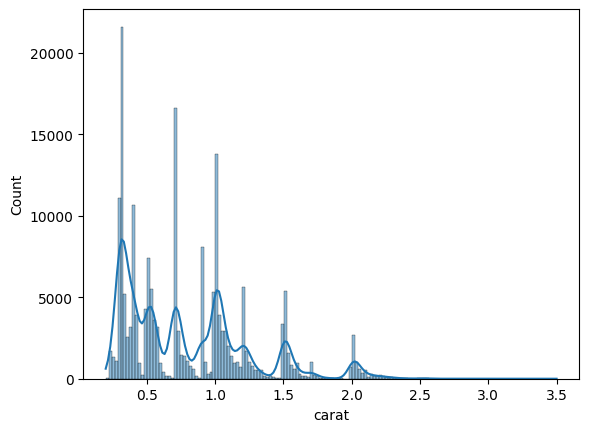

In [11]:
sns.histplot(df['carat'],kde=True)

<Axes: >

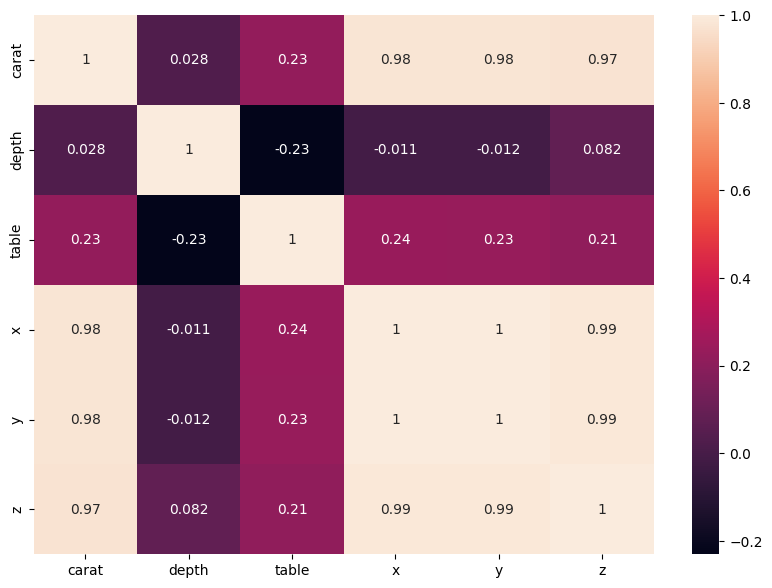

In [12]:
#co-relation matrix
plt.figure(figsize=(10,7))
sns.heatmap(df[num_col].corr(),annot=True)

In [13]:
df.head(1)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619


In [14]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [15]:
# Science all the categorical cal follow some order then we have to assign them order

''''cut_rank = {'Premium':5, 'Very Good':3, 'Ideal':4, 'Good':2, 'Fair':1}
clarity_rank = {'VS2':4, 'SI2':2, 'VS1':5, 'SI1':3, 'IF':8, 'VVS2':6, 'VVS1':7, 'I1':1}
color_rank = {'F':3, 'J':7, 'G':4, 'E':2, 'D':1, 'H':5, 'I':6}
'''

"'cut_rank = {'Premium':5, 'Very Good':3, 'Ideal':4, 'Good':2, 'Fair':1}\nclarity_rank = {'VS2':4, 'SI2':2, 'VS1':5, 'SI1':3, 'IF':8, 'VVS2':6, 'VVS1':7, 'I1':1}\ncolor_rank = {'F':3, 'J':7, 'G':4, 'E':2, 'D':1, 'H':5, 'I':6}\n"

In [16]:
''''df['cut'] = df['cut'].map(cut_rank)
df['clarity'] = df['clarity'].map(clarity_rank)
df['color'] = df['color'].map(color_rank)'''

"'df['cut'] = df['cut'].map(cut_rank)\ndf['clarity'] = df['clarity'].map(clarity_rank)\ndf['color'] = df['color'].map(color_rank)"

In [17]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


# Model training


In [18]:
df = pd.read_csv('gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [19]:
df.drop(['id'],inplace=True,axis='columns')

In [20]:
print(num_col)
print(cat_col)

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


In [21]:
cut_category = ['Fair','Good','Very Good','Ideal','Premium']
color_category = ['D','E','F','G','H','I','J']
clarity_category = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [22]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [23]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
## pipeline for numerical col

pipe_num = Pipeline([
    ('imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
     ('stander_scaler',StandardScaler())
])

#categorial col

pipe_cat = Pipeline(steps=[
    ('imputer',SimpleImputer(missing_values=np.nan,strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(categories=[cut_category,color_category,clarity_category])),

])

preprocessor = ColumnTransformer([
    ('num_trf',pipe_num,num_col),
    ('cat_trf',pipe_cat,cat_col)
])

In [25]:
print(num_col)
print(cat_col)

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=30)

In [27]:
X_train.shape ,X_test.shape,y_test.shape

((135501, 9), (58072, 9), (58072, 1))

In [28]:
y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [29]:

X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())


In [30]:
X_test = pd.DataFrame(preprocessor.transform(X_test),columns= preprocessor.get_feature_names_out())

In [31]:
X_test

,num_trf__carat,num_trf__depth,num_trf__table,num_trf__x,num_trf__y,num_trf__z,cat_trf__cut,cat_trf__color,cat_trf__clarity
0,-0.564688,-0.942132,-0.642862,-0.429765,-0.464061,-0.500036,4.0,1.0,3.0
1,-0.175556,1.000906,-0.121531,-0.042137,-0.028595,0.036132,2.0,4.0,2.0
2,-1.061913,0.260701,-0.121531,-1.304180,-1.298703,-1.268060,3.0,4.0,7.0
3,0.970223,-0.201927,1.963794,1.048629,0.996563,0.978049,4.0,3.0,3.0
4,-0.932202,-1.312235,0.399800,-1.006699,-0.990248,-1.065186,4.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...
58067,1.013460,1.185958,-0.642862,1.003556,1.041924,1.151941,2.0,4.0,3.0
58068,-0.997058,0.260701,-1.164193,-1.141917,-1.126331,-1.108659,3.0,2.0,6.0
58069,-0.197174,-3.347799,1.442462,0.102096,0.071199,-0.224706,4.0,6.0,3.0
58070,-0.824110,-0.201927,-0.121531,-0.853450,-0.881382,-0.876803,3.0,3.0,2.0


In [32]:
X_train

,num_trf__carat,num_trf__depth,num_trf__table,num_trf__x,num_trf__y,num_trf__z,cat_trf__cut,cat_trf__color,cat_trf__clarity
0,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150,3.0,5.0,5.0
1,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354,1.0,1.0,2.0
2,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737,4.0,3.0,4.0
3,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605,4.0,3.0,3.0
4,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168,3.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...
135496,-1.040295,-0.016876,-0.642862,-1.268122,-1.244270,-1.239078,3.0,1.0,2.0
135497,0.991842,0.168176,-0.642862,1.048629,1.114501,1.079486,3.0,3.0,1.0
135498,0.451380,1.556060,-0.642862,0.516768,0.588314,0.702719,1.0,3.0,2.0
135499,0.667565,-1.774863,1.442462,0.868337,0.951202,0.688228,3.0,3.0,4.0


### Creating model


In [41]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVC

#module for evaluation

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [42]:
def evaluate_model(acutal_val,predicted_value):
    mae = mean_squared_error(acutal_val,predicted_value)
    mse = mean_squared_error(acutal_val,predicted_value)
    rmse = np.sqrt(mean_squared_error(acutal_val,predicted_value))
    r2_square = r2_score(acutal_val,predicted_value)

    return mae,rmse,r2_square

In [36]:
models = { 
    'Linear Regression': LinearRegression(),
    'Lasso':Lasso(),
    'Ridge Regression': Ridge(),
    'Descision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [48]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #making prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #model evaluation
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    mode_test_mae, model_test_rmse , model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.values())[i])
    model_list.append(list(models.values())[i])

    print("Model prediction for Traning set")
    print(f'RMSE{model_train_rmse}')
    print(f'MAE{model_train_mae}')
    print(f'R2_score{model_train_r2}')

    print('----------------------------------')

    print("Model prediction for Testing set")
    print(f'RMSE{model_test_rmse}')
    print(f'MAE{mode_test_mae}')
    print(f'R2_score{model_test_r2}')
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')




LinearRegression()
Model prediction for Traning set
RMSE1015.7172636460176
MAE1031681.5596685536
R2_score0.9365916274012525
----------------------------------
Model prediction for Testing set
RMSE1014.1186666192426
MAE1028436.6699855905
R2_score0.9368641870750907


Lasso()
Model prediction for Traning set
RMSE1015.8211024882883
MAE1031892.5122605215
R2_score0.9365786620046853
----------------------------------
Model prediction for Testing set
RMSE1014.0785940949842
MAE1028355.3950016596
R2_score0.9368691765531312


Ridge()
Model prediction for Traning set
RMSE1015.7173454348426
MAE1031681.7258172034
R2_score0.9365916171895594
----------------------------------
Model prediction for Testing set
RMSE1014.1205763807889
MAE1028440.5434389035
R2_score0.9368639492834687


DecisionTreeRegressor()
Model prediction for Traning set
RMSE13.356070098560961
MAE178.3846084776742
R2_score0.9999890362703353
----------------------------------
Model prediction for Testing set
RMSE835.7528265633492
MAE698

C:\Users\Tafique Hossain Khan\AppData\Local\Temp\ipykernel_7000\4233567265.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor()
Model prediction for Traning set
RMSE228.05252840445144
MAE52007.95571166313
R2_score0.9968035293420154
----------------------------------
Model prediction for Testing set
RMSE611.5015292469653
MAE373934.1202713772
R2_score0.9770441531766608




c:\Users\Tafique Hossain Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()
Model prediction for Traning set
RMSE1455.1196447570555
MAE2117373.1805578996
R2_score0.8698637323647197
----------------------------------
Model prediction for Testing set
RMSE1455.8651979497447
MAE2119543.474601249
R2_score0.8698810493595956




In [49]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score'])

,Model Name,R2 Score
0,LinearRegression(),0.936864
1,Lasso(),0.936869
2,Ridge(),0.936864
3,DecisionTreeRegressor(),0.957120
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.977044
5,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.869881
